### Implementing the Machine Learning Model

In [23]:
import pandas as pd 
import numpy as np 

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt 
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [24]:
df = pd.read_csv('data/clean_data_AirQualityUCI.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,C6H6(GT),NO2/NOx(GT),Dew_Point
Datetime,,,
2004-03-10 18:00:00,11.9,0.680723,3.38
2004-03-10 19:00:00,9.4,0.893204,2.84
2004-03-10 20:00:00,9.0,0.870229,2.70
2004-03-10 21:00:00,9.2,0.709302,3.00
2004-03-10 22:00:00,6.5,0.885496,3.12


In [25]:
overall_duration = df.index.max() - df.index.min()
split_point = df.index.min() + 0.8 * overall_duration

print(f"Overall duration: {overall_duration}")
print(f"80% point: {split_point}")

Overall duration: 389 days 20:00:00
80% point: 2005-01-16 14:48:00


In [34]:
benz = pd.DataFrame(df['C6H6(GT)'])

In [37]:
train = benz.loc[benz.index < '2005-01-16']
test = benz.loc[benz.index >= '2005-01-16']

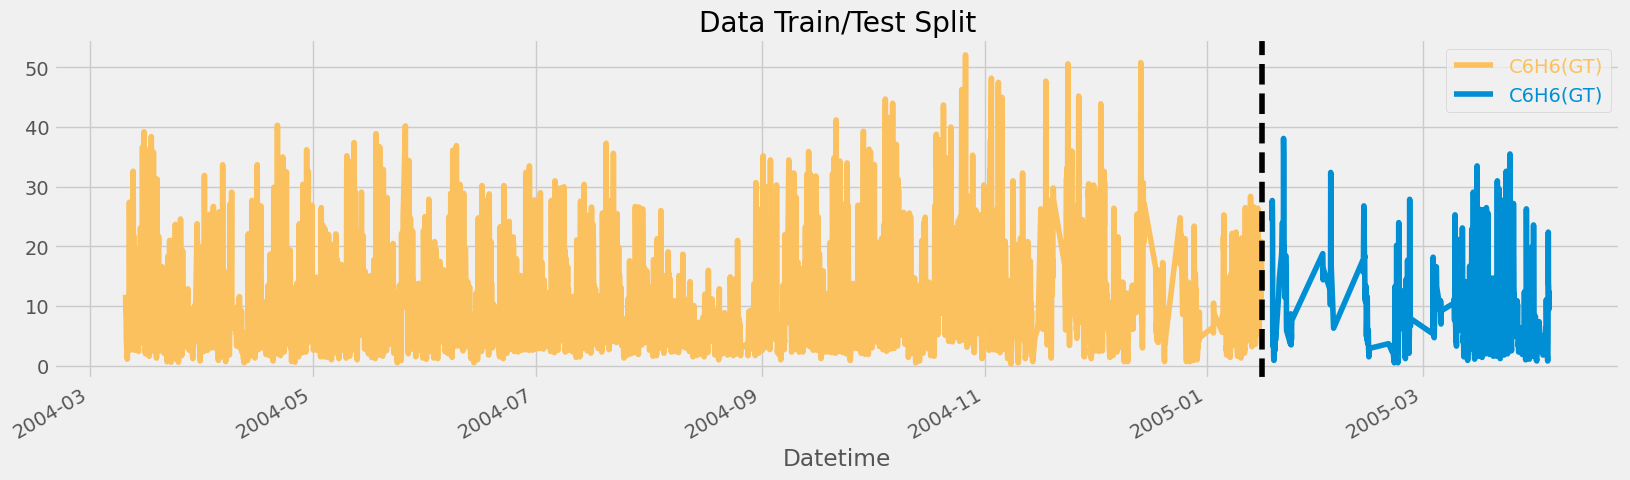

In [56]:

fig, ax = plt.subplots(figsize=(18, 5))

train.plot(ax = ax,label='Train', title='Data Train/Test Split',color=color_pal[4])
test.plot(ax = ax,label ='Test')
ax.axvline('2005-01-16',color='black',ls='--')
ax.legend(labelcolor='black')
plt.title('Data Train/Test Split',color='black')
plt.show()